In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt
from skmultiflow.trees import ExtremelyFastDecisionTreeClassifier
from skmultiflow.meta import BatchIncrementalClassifier
from sklearn import tree

In [69]:
#Referenced from the given notebook 
def roc_auc_score_multiclass(actual_class, pred_class, pred_proba):

  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    other_class = [x for x in unique_class if x != per_class]
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]
    roc_auc = mt.roc_auc_score(new_actual_class, new_pred_class, average = None)
    roc_auc_dict[per_class] = roc_auc
  columns = np.shape(pred_proba)[1]
  if columns == 3:
    fpr1, tpr1, thresh1 = mt.roc_curve(actual_class, pred_proba[:,0],pos_label=1)
    fpr2, tpr2, thresh2 = mt.roc_curve(actual_class, pred_proba[:,1],pos_label=2)
    fpr3, tpr3, thresh3 = mt.roc_curve(actual_class, pred_proba[:,2],pos_label=3)
  else:
    fpr1, tpr1, thresh1 = mt.roc_curve(actual_class, pred_proba[:,1],pos_label=1)
    fpr2, tpr2, thresh2 = mt.roc_curve(actual_class, pred_proba[:,2],pos_label=2)
    fpr3, tpr3, thresh3 = mt.roc_curve(actual_class, pred_proba[:,3],pos_label=3)
    fprr, tprr, threshr = mt.roc_curve(actual_class, pred_proba[:,0],pos_label=0)
  

  plt.style.use('seaborn')
  s1 = 'Class1 AUC ' + str(roc_auc_dict[1])
  s2 = 'Class2 AUC ' + str(roc_auc_dict[2])
  s3 = 'Class3 AUC ' + str(roc_auc_dict[3])
  plt.plot(fpr1,tpr1,linestyle='--',color='green',label=s1)
  plt.plot(fpr2,tpr2,linestyle='--',color='orange',label=s2)
  plt.plot(fpr3,tpr3,linestyle='--',color='blue',label=s3)
  if columns==4:
    plt.plot(fprr,tprr, color ='red', label = 'Random')
  plt.xlabel('False positive')
  plt.ylabel('True positives')
  plt.title('ROC curves')
  plt.legend(loc='best')
  plt.show()
  return roc_auc_dict

In [70]:
df = pd.read_csv('../Data/data_1.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
1,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
2,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
3,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
4,131,0.005,0.072,0.008,0.003,0.0,0.0,28,1.4,0,...,88,154,5,0,135,134,137,7,1,1


In [71]:
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4, stratify = y)
X_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
26,116,0.004,0.012,0.005,0.0,0.0,0.0,40,1.8,1,...,142,52,194,13,1,125,122,125,9,0
522,138,0.002,0.000,0.004,0.0,0.0,0.0,41,0.8,8,...,51,105,156,4,0,142,142,143,2,1
1433,140,0.000,0.019,0.000,0.0,0.0,0.0,77,0.2,82,...,8,136,144,1,0,141,140,142,0,0
214,120,0.005,0.000,0.010,0.0,0.0,0.0,56,0.9,13,...,130,55,185,10,0,125,128,130,8,0
1013,132,0.000,0.000,0.005,0.0,0.0,0.0,33,1.0,0,...,35,120,155,1,0,138,138,139,2,0


Model accuracy score: 0.9345
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       240
           2       0.82      0.68      0.74        40
           3       1.00      1.00      1.00        10

    accuracy                           0.93       290
   macro avg       0.92      0.88      0.90       290
weighted avg       0.93      0.93      0.93       290



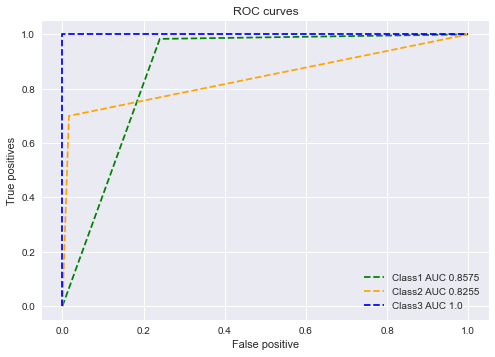

AUC-ROC score: {1: 0.8575, 2: 0.8255, 3: 1.0}


In [73]:
clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))

plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names = X.columns,class_names=np.unique(y).astype('str'), filled = True) 
plt.savefig('../Visualisations/DT_A_1.pdf',format = 'pdf')
plt.close()
y_pred_proba = clf_gini.predict_proba(X_test)

roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC score:',roc_auc_scores)

{1: 0.903448275862069, 2: 0.9172413793103448, 3: 0.9379310344827586, 4: 0.9448275862068966, 5: 0.9448275862068966, 6: 0.9586206896551724, 7: 0.9482758620689655, 8: 0.9448275862068966}


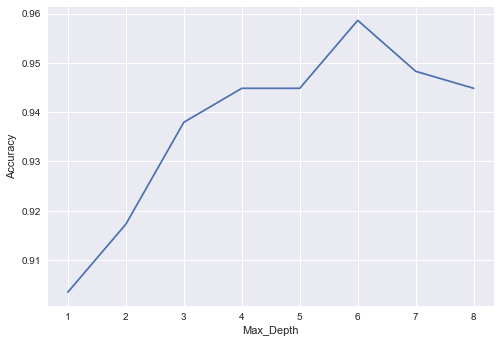

In [74]:
#Part A Question 2
dicti = {}
for i in range(1,9):
    temp_clf = DecisionTreeClassifier(max_depth = i)
    temp_clf.fit(X_train, y_train)
    temp_pred = temp_clf.predict(X_test)
    temp_accuracy = mt.accuracy_score(y_test, temp_pred)
    dicti[i]=temp_accuracy

print(dicti)
plt.figure()
plt.plot(dicti.keys(),dicti.values())
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.show()

    

Model accuracy score: 0.9552
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       240
           2       0.97      0.70      0.81        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.97      0.90      0.93       290
weighted avg       0.96      0.96      0.95       290



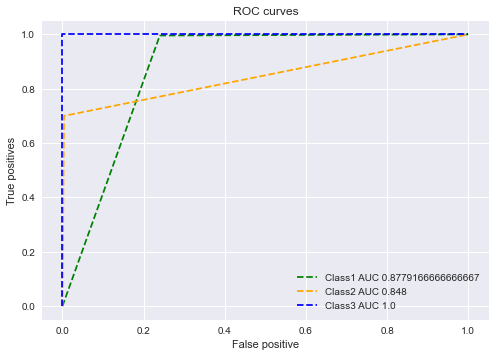

AUC-ROC curve: {1: 0.8779166666666667, 2: 0.848, 3: 1.0}


In [75]:
#Part A Question 3

#Changing criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_gini = clf_entropy.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_entropy.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)


Model accuracy score: 0.9414
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       240
           2       0.83      0.75      0.79        40
           3       0.90      0.90      0.90        10

    accuracy                           0.94       290
   macro avg       0.90      0.88      0.89       290
weighted avg       0.94      0.94      0.94       290



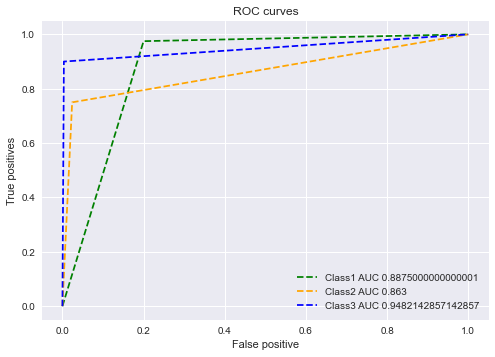

AUC-ROC curve: {1: 0.8875000000000001, 2: 0.863, 3: 0.9482142857142857}
Model accuracy score: 0.9517
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       240
           2       0.91      0.72      0.81        40
           3       1.00      1.00      1.00        10

    accuracy                           0.95       290
   macro avg       0.95      0.90      0.93       290
weighted avg       0.95      0.95      0.95       290



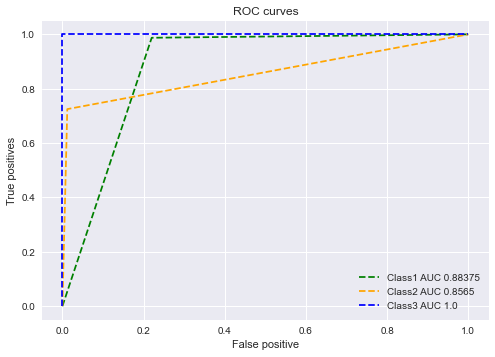

AUC-ROC curve: {1: 0.88375, 2: 0.8565, 3: 1.0}


In [76]:
#Changing splitter, default = best
clf_split = DecisionTreeClassifier(splitter='random')
clf_split.fit(X_train, y_train)
y_pred_gini = clf_split.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_split.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

clf_split = DecisionTreeClassifier()
clf_split.fit(X_train, y_train)
y_pred_gini = clf_split.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_split.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)


Model accuracy score: 0.9414
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       240
           2       0.85      0.70      0.77        40
           3       1.00      1.00      1.00        10

    accuracy                           0.94       290
   macro avg       0.93      0.89      0.91       290
weighted avg       0.94      0.94      0.94       290



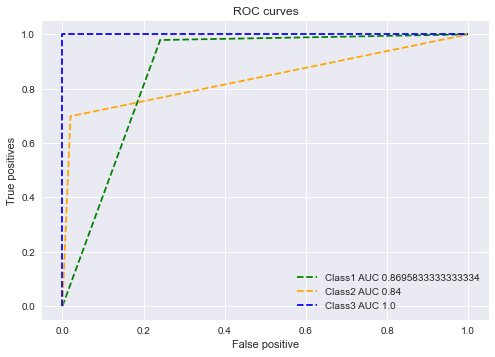

AUC-ROC curve: {1: 0.8695833333333334, 2: 0.84, 3: 1.0}


In [77]:
#Changing min_samples_split default = 2
clf_min_sam_split = DecisionTreeClassifier(min_samples_split=3)
clf_min_sam_split.fit(X_train, y_train)
y_pred_gini = clf_min_sam_split.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_min_sam_split.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

Model accuracy score: 0.9552
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       240
           2       0.97      0.70      0.81        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.97      0.90      0.93       290
weighted avg       0.96      0.96      0.95       290



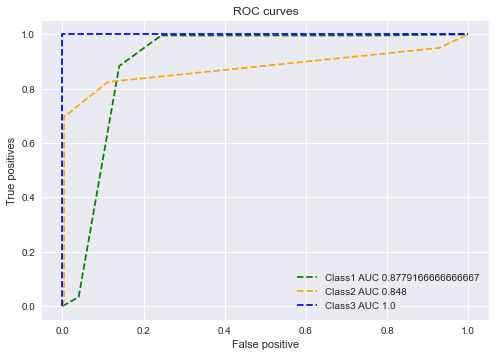

AUC-ROC curve: {1: 0.8779166666666667, 2: 0.848, 3: 1.0}


In [78]:
#Changing max_depth default = None
clf_max_depth = DecisionTreeClassifier(max_depth = 6)
clf_max_depth.fit(X_train, y_train)
y_pred_gini = clf_max_depth.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_max_depth.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)


Model accuracy score: 0.9552
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       240
           2       0.89      0.78      0.83        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.95      0.92      0.93       290
weighted avg       0.95      0.96      0.95       290



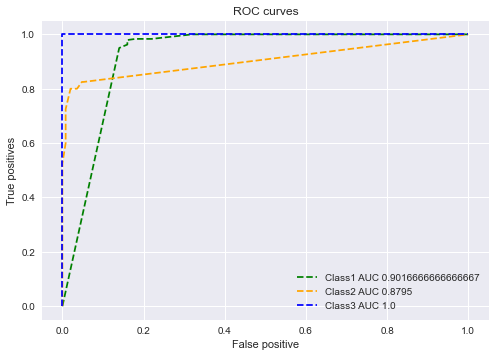

AUC-ROC curve: {1: 0.9016666666666667, 2: 0.8795, 3: 1.0}


In [79]:
#Changing min_samples_leaf default = 1
clf_min_sam_leaf = DecisionTreeClassifier(min_samples_leaf=6)
clf_min_sam_leaf.fit(X_train, y_train)
y_pred_gini = clf_min_sam_leaf.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_min_sam_leaf.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

Model accuracy score: 0.9414
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       240
           2       0.96      0.62      0.76        40
           3       0.67      1.00      0.80        10

    accuracy                           0.94       290
   macro avg       0.86      0.87      0.84       290
weighted avg       0.95      0.94      0.94       290



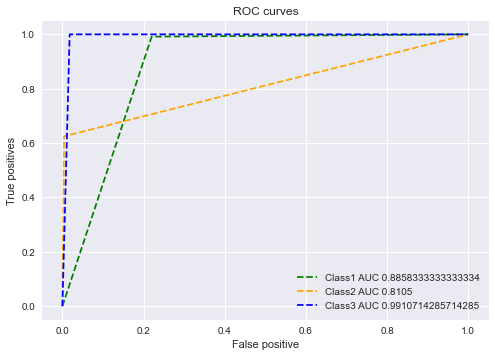

AUC-ROC curve: {1: 0.8858333333333334, 2: 0.8105, 3: 0.9910714285714285}
Model accuracy score: 0.9345
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       240
           2       0.84      0.65      0.73        40
           3       0.90      0.90      0.90        10

    accuracy                           0.93       290
   macro avg       0.90      0.84      0.87       290
weighted avg       0.93      0.93      0.93       290



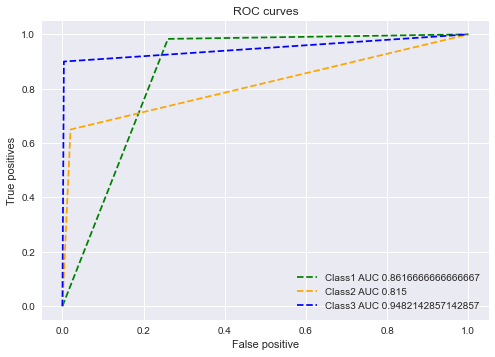

AUC-ROC curve: {1: 0.8616666666666667, 2: 0.815, 3: 0.9482142857142857}
Model accuracy score: 0.9241
              precision    recall  f1-score   support

           1       0.95      0.98      0.96       240
           2       0.79      0.65      0.71        40
           3       0.78      0.70      0.74        10

    accuracy                           0.92       290
   macro avg       0.84      0.78      0.80       290
weighted avg       0.92      0.92      0.92       290



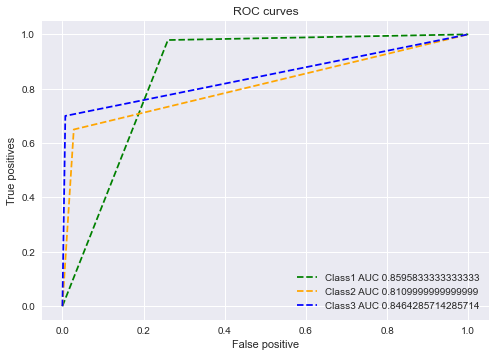

AUC-ROC curve: {1: 0.8595833333333333, 2: 0.8109999999999999, 3: 0.8464285714285714}


In [80]:
#Changing max_features default = None
clf_max_featu = DecisionTreeClassifier(max_features='sqrt')
clf_max_featu.fit(X_train, y_train)
y_pred_gini = clf_max_featu.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_max_featu.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)


clf_max_featu = DecisionTreeClassifier(max_features='log2')
clf_max_featu.fit(X_train, y_train)
y_pred_gini = clf_max_featu.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_max_featu.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

clf_max_featu = DecisionTreeClassifier(max_features='auto')
clf_max_featu.fit(X_train, y_train)
y_pred_gini = clf_max_featu.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_max_featu.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

Model accuracy score: 0.9621
              precision    recall  f1-score   support

           1       0.96      0.99      0.98       240
           2       0.94      0.78      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.97      0.92      0.94       290
weighted avg       0.96      0.96      0.96       290



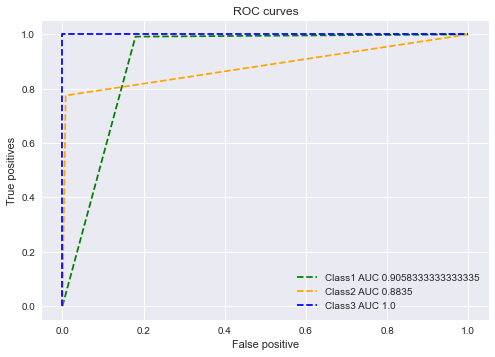

AUC-ROC curve: {1: 0.9058333333333335, 2: 0.8835, 3: 1.0}


In [81]:
#Changing class_weight default = none
clf_class_weight = DecisionTreeClassifier(class_weight='balanced')
clf_class_weight.fit(X_train, y_train)
y_pred_gini = clf_class_weight.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_class_weight.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

Model accuracy score: 0.9448
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       240
           2       0.90      0.68      0.77        40
           3       1.00      1.00      1.00        10

    accuracy                           0.94       290
   macro avg       0.95      0.89      0.91       290
weighted avg       0.94      0.94      0.94       290



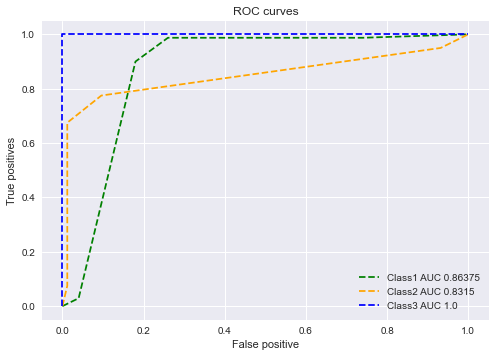

AUC-ROC curve: {1: 0.86375, 2: 0.8315, 3: 1.0}


In [82]:
#Changing max_leaf_nodes default = None
clf_max_leaf_nod = DecisionTreeClassifier(max_leaf_nodes=22)
clf_max_leaf_nod.fit(X_train, y_train)
y_pred_gini = clf_max_leaf_nod.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_max_leaf_nod.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

Model accuracy score: 0.9586
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290



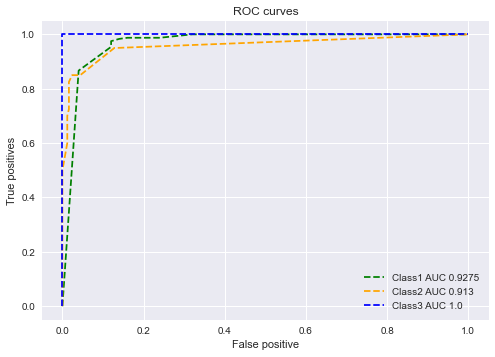

AUC-ROC curve: {1: 0.9275, 2: 0.913, 3: 1.0}


In [83]:
# Selecting the best hyperparameters to create DT-A
clf_DT_A = DecisionTreeClassifier(random_state = 0, min_samples_split = 3, max_depth = 6, min_samples_leaf = 6, class_weight='balanced', max_leaf_nodes=22)
clf_DT_A.fit(X_train, y_train)
y_pred_gini = clf_DT_A.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_DT_A.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

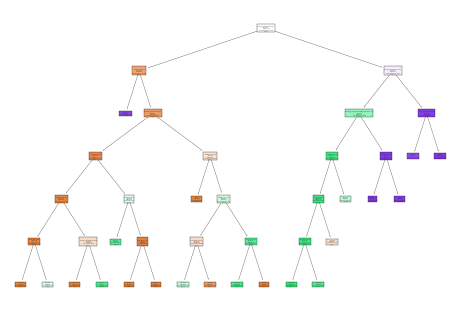

In [84]:
tree.plot_tree(clf_DT_A.fit(X_train, y_train), feature_names = X.columns, class_names=np.unique(y).astype('str'), filled = True) 

plt.savefig('../Visualisations/test1.pdf',format = 'pdf')

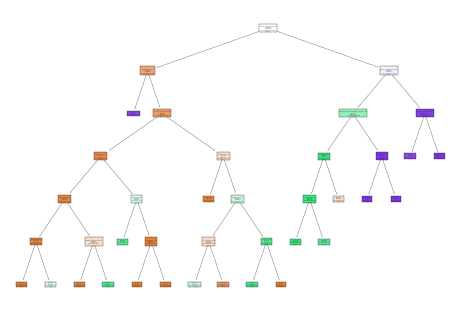

In [85]:
#Part B
#Q1 Deleting a random node

from sklearn.tree._tree import TREE_LEAF
import random
def delete_random_node(inner_tree, index):
    left_child = inner_tree.children_left[index]
    if left_child != -1:
        samples_right = inner_tree.n_node_samples[inner_tree.children_right[left_child]]
        samples_left = inner_tree.n_node_samples[inner_tree.children_left[left_child]]
        if samples_right > samples_left:
            inner_tree.children_left[index] = inner_tree.children_right[left_child]
        else:
            inner_tree.children_left[index] = inner_tree.children_left[left_child]
        #print(inner_tree.n_node_samples[inner_tree.children_right[left_child]])
        #print(inner_tree.n_node_samples[inner_tree.children_left[left_child]])
        #print(inner_tree.children_right[index])
        #print(inner_tree.children_left[index])
        return inner_tree

clf_DT_A.tree_ = delete_random_node(clf_DT_A.tree_, 3)

tree.plot_tree(clf_DT_A,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 

plt.savefig('DT_B_1.pdf',format = 'pdf')

Model accuracy score: 0.9586
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290



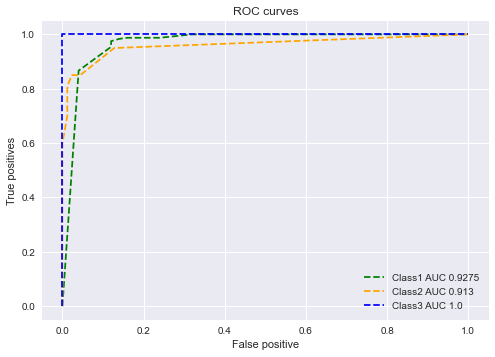

AUC-ROC curve: {1: 0.9275, 2: 0.913, 3: 1.0}


In [86]:
y_pred_gini = clf_DT_A.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))
y_pred_proba = clf_DT_A.predict_proba(X_test)
roc_auc_scores = roc_auc_score_multiclass(y_test.to_numpy(), y_pred_gini,y_pred_proba)
print('AUC-ROC curve:',roc_auc_scores)

In [87]:
#adding the removed node
clf_DT_A.fit(X_train, y_train)
0

0

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

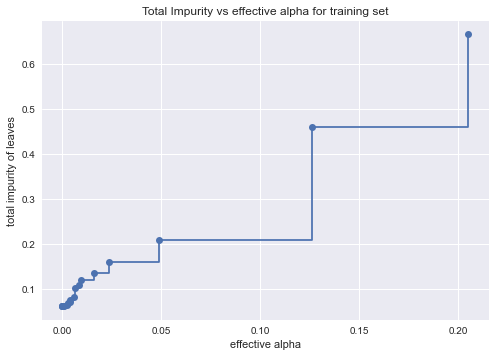

In [88]:
#Cost Complexity Pruning
path = clf_DT_A.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:], impurities[:], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [89]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0, min_samples_split = 3, max_depth = 6, min_samples_leaf = 6, class_weight='balanced', max_leaf_nodes=22)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2051769619768425


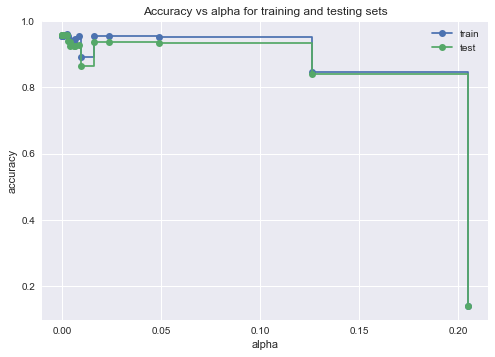

In [90]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:], train_scores[:], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:], test_scores[:], marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

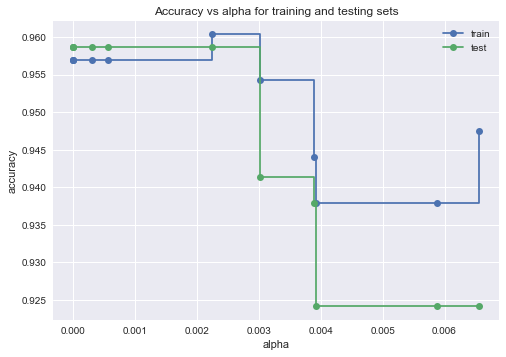

In [91]:
#To get a clearer view of the highest accuracy in test and train sets for given alpha

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-7], train_scores[:-7], marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-7], test_scores[:-7], marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [92]:
print("For the alpha value, ", ccp_alphas[5], " we get the highest training score: ", train_scores[5], " and the highest test score: ", test_scores[5])

For the alpha value,  0.0022377622377621133  we get the highest training score:  0.9603448275862069  and the highest test score:  0.9586206896551724


In [93]:
DT_B_2_CC = clfs[5]

y_pred_gini = DT_B_2_CC.predict(X_test)
print("For DT_B_2_CC, the best alpha value is: ", ccp_alphas[5])
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))

y_pred_gini = clf_DT_A.predict(X_test)
print("For DT_A,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))

For DT_B_2_CC, the best alpha value is:  0.0022377622377621133
Model accuracy score: 0.9586
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290

For DT_A,
Model accuracy score: 0.9586
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290



In [94]:
#The second method of pruning we are using is pre pruning by finding the 
#best minimum samples at split tree and the best minimum samples at leaf tree
# using GridSearchCV from sklearn

from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer,accuracy_score

min_sample_split_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0), scoring = make_scorer(accuracy_score), param_grid = ParameterGrid({"min_samples_split": [ [min_samples_split] for min_samples_split in np.arange(np.finfo(float).eps, 1, 0.025) ]}))
min_sample_split_search.fit(X_train, y_train)
min_sample_split_search.best_params_

{'min_samples_split': 0.07500000000000023}

In [95]:
min_sample_split_search_tree = min_sample_split_search.best_estimator_
y_pred_gini = min_sample_split_search_tree.predict(X_test)
print("For testing the best minimum samples at split tree,")
print('Model accuracy score of pre pruned tree: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
# We see it is better than the normal model which was 0.9414


For testing the best minimum samples at split tree,
Model accuracy score of pre pruned tree: 0.9448


In [96]:
min_sample_leaf_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0), scoring = make_scorer(accuracy_score), param_grid = ParameterGrid({"min_samples_leaf": [ [min_samples_leaf] for min_samples_leaf in np.arange(np.finfo(float).eps, 0.5, 0.025) ]}))
min_sample_leaf_search.fit(X_train, y_train)
min_sample_leaf_search.best_params_

{'min_samples_leaf': 2.220446049250313e-16}

In [97]:
min_sample_leaf_search_tree = min_sample_leaf_search.best_estimator_
y_pred_gini = min_sample_leaf_search_tree.predict(X_test)
print("For testing the best minimum samples at leaf tree,")
print('Model accuracy score of pre pruned tree: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
# We see it is worse than the normal model which was 0.9414

For testing the best minimum samples at leaf tree,
Model accuracy score of pre pruned tree: 0.9379


In [98]:
# So we pick the first DT as the pre pruned DT-B-2-XX
DT_B_2_XX = min_sample_split_search.best_estimator_
y_pred_gini = DT_B_2_XX.predict(X_test)
print("For DT_B_2_XX,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))

y_pred_gini = clf_DT_A.predict(X_test)
print("For DT_A,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print(mt.classification_report(y_test,y_pred_gini))


For DT_B_2_XX,
Model accuracy score: 0.9448
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       240
           2       1.00      0.60      0.75        40
           3       1.00      1.00      1.00        10

    accuracy                           0.94       290
   macro avg       0.98      0.87      0.91       290
weighted avg       0.95      0.94      0.94       290

For DT_A,
Model accuracy score: 0.9586
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290



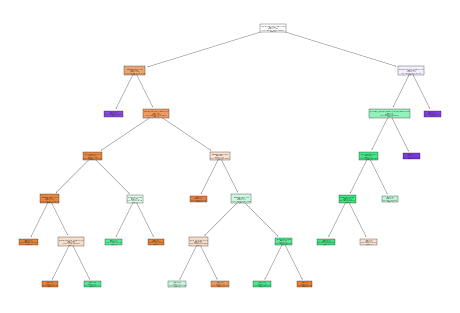

In [99]:
# Visualizations of DT_B_2_CC and DT_B_2_XX

tree.plot_tree(DT_B_2_CC,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 

plt.savefig('../Visualisations/DT_B_2_CC.pdf',format = 'pdf')


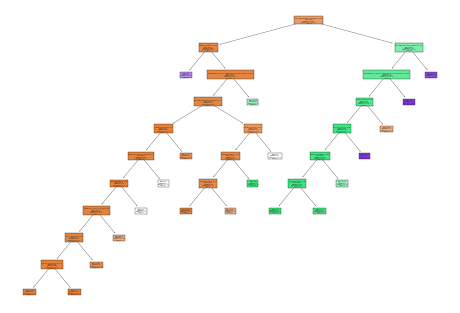

In [100]:
tree.plot_tree(DT_B_2_XX,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 

plt.savefig('../Visualisations/DT_B_2_XX.pdf',format = 'pdf')

0

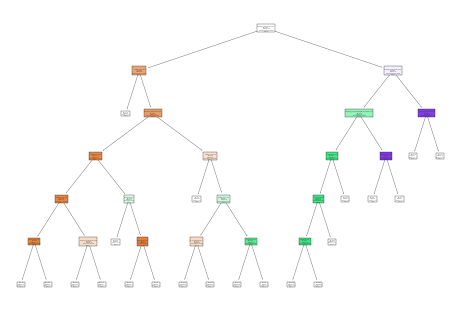

In [101]:
# Part B Question 3
# Using Hybrid SLIQ Pruning on DT_A



def calc_code_lengths(tree, index, dict_c, dict_l):
    if tree.children_left[index] != -1 and tree.children_right[index] != -1:
        left_c = calc_code_lengths(tree, tree.children_left[index], dict_c, dict_l)
        right_c = calc_code_lengths(tree, tree.children_right[index], dict_c, dict_l)
        curr_cost = 1 + 1 + left_c + right_c 
        dict_c[index] = curr_cost
        return curr_cost
    else:
        list_l = tree.value[index][0]
        #print(list_l)
        max_index = 0
        if list_l[1] > list_l[max_index]:
            max_index = 1
        if list_l[2] > list_l[max_index]:
            max_index = 2
        errorst = sum(list_l) - list_l[max_index]
        #print(index, " ", errorst)
        dict_l[index] = 1 + errorst
        dict_c[index] = 1+errorst
        return 1+errorst

def first_pass(tree, dict_l):
    for key in dict_l.keys():
        tree.value[key] = TREE_LEAF
    
def hybrid_sliq(tree, dict_c):
    for key in dict_c.keys():
        tree1_cost = dict_c[key]
        #prune left or not
        left_child = tree.children_left[key]
        if left_child != -1:
            tree2_cost = tree1_cost - dict_c[left_child]
            if tree1_cost > tree2_cost:
                tree.children_left[key] = -1
            #else:
                #keep unpruned
        
        #prune right or not
        right_child = tree.children_right[key]
        if right_child != -1:
            tree2_cost = tree1_cost - dict_c[right_child]
            if tree1_cost > tree2_cost:
                tree.children_right[key] = -1
            #else:
                #keep unpruned
    
    
dict_code_lengths = {}
dict_code_lengths_l = {}
calc_code_lengths(clf_DT_A.tree_, 0, dict_code_lengths, dict_code_lengths_l)
first_pass(clf_DT_A.tree_, dict_code_lengths_l)

#plotting to check pruning
tree.plot_tree(clf_DT_A,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 
0

0

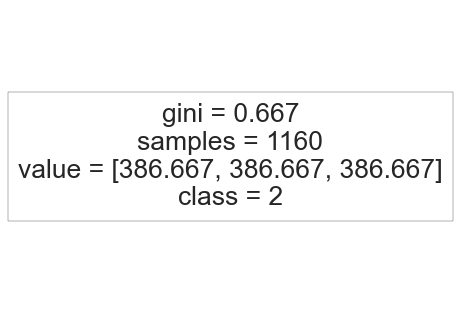

In [102]:
hybrid_sliq(clf_DT_A.tree_, dict_code_lengths)
#plotting to check pruning
tree.plot_tree(clf_DT_A,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 
0

In [103]:
#comparing accuracy and metrics to other trees

y_pred_gini = DT_B_2_XX.predict(X_test)
print("For DT_B_2_XX,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print("Tree size: ", DT_B_2_XX.tree_.node_count)
print(mt.classification_report(y_test,y_pred_gini))

y_pred_gini = DT_B_2_CC.predict(X_test)
print("For DT_B_2_CC,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print("Tree size: ", DT_B_2_CC.tree_.node_count)
print(mt.classification_report(y_test,y_pred_gini))

y_pred_gini = clf_DT_A.predict(X_test)
print("For DT_B_3,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print("Tree size: ", clf_DT_A.tree_.node_count)
print(mt.classification_report(y_test,y_pred_gini))

For DT_B_2_XX,
Model accuracy score: 0.9448
Tree size:  39
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       240
           2       1.00      0.60      0.75        40
           3       1.00      1.00      1.00        10

    accuracy                           0.94       290
   macro avg       0.98      0.87      0.91       290
weighted avg       0.95      0.94      0.94       290

For DT_B_2_CC,
Model accuracy score: 0.9586
Tree size:  31
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290

For DT_B_3,
Model accuracy score: 0.1379
Tree size:  41
              precision    recall  f1-score   support

         

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
#fitting the original without any tree modifications
clf_DT_A.fit(X_train, y_train)
0
y_pred_gini = clf_DT_A.predict(X_test)
print("For DT_A,")
print('Model accuracy score: {0:0.4f}'.format(mt.accuracy_score(y_test,y_pred_gini)))
print("Tree size: ", clf_DT_A.tree_.node_count)
print(mt.classification_report(y_test,y_pred_gini))

For DT_A,
Model accuracy score: 0.9586
Tree size:  41
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.85      0.85      0.85        40
           3       1.00      1.00      1.00        10

    accuracy                           0.96       290
   macro avg       0.94      0.94      0.94       290
weighted avg       0.96      0.96      0.96       290



Best performing model is either DT_A or DT_B_2_CC


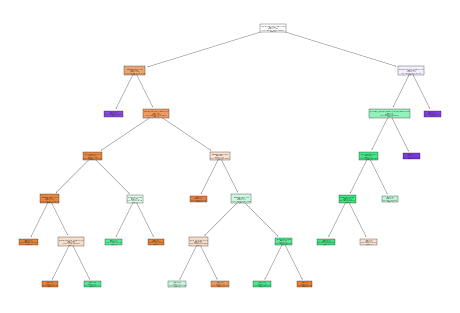

In [105]:
print("Best performing model is either DT_A or DT_B_2_CC")
tree.plot_tree(DT_B_2_CC,
               feature_names = X.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 
plt.savefig('../Visualisations/DT_B_3.pdf',format = 'pdf')

1160 samples analyzed.
DT-C-1 trained
290 samples analyzed.
DT-C-1 tested
              precision    recall  f1-score   support

           1       0.90      0.98      0.94       240
           2       0.63      0.30      0.41        40
           3       0.60      0.60      0.60        10

    accuracy                           0.87       290
   macro avg       0.71      0.63      0.65       290
weighted avg       0.85      0.87      0.85       290



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


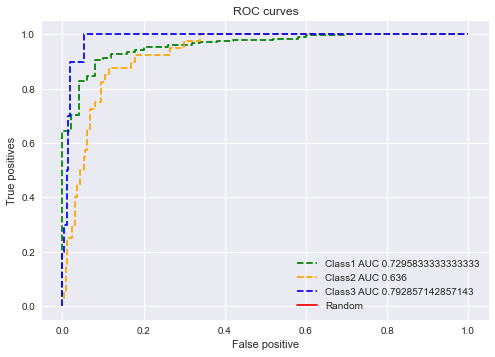

DT-C-1 tested on data_2
              precision    recall  f1-score   support

           1       0.81      0.95      0.87        92
           2       0.88      0.37      0.52        19
           3       0.67      0.56      0.61        25

    accuracy                           0.79       136
   macro avg       0.78      0.62      0.67       136
weighted avg       0.79      0.79      0.78       136



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


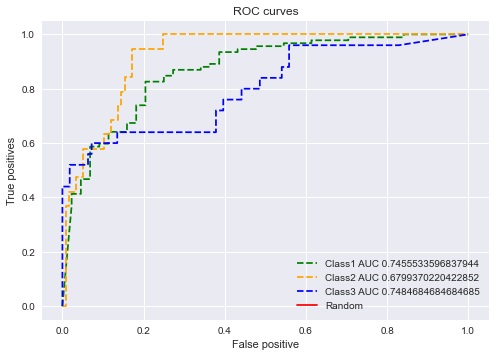

540 samples analyzed.
DT-C-1-X trained 
136 samples analyzed.
DT-C-1-X tested
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        92
           2       0.89      0.42      0.57        19
           3       0.69      0.96      0.80        25

    accuracy                           0.84       136
   macro avg       0.82      0.76      0.75       136
weighted avg       0.85      0.84      0.83       136



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:998: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


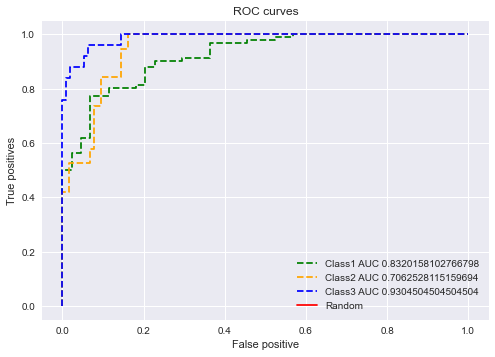

{1: 0.8320158102766798, 2: 0.7062528115159694, 3: 0.9304504504504504}

In [110]:
#Part C Question 1

from skmultiflow.data import DataStream
from skmultiflow.trees import HoeffdingTreeClassifier
#Code referenced from https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.trees.HoeffdingTreeClassifier.html

# Setup a data stream
stream = DataStream(X_train.to_numpy(), y_train.to_numpy())
vfdt = HoeffdingTreeClassifier()
# Setup variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 1160
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = vfdt.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    vfdt.partial_fit(X, y, classes = [1,2,3])
    n_samples += 1
# Display results
print('{} samples analyzed.'.format(n_samples))
print('DT-C-1 trained')

stream = DataStream(X_test.to_numpy(), y_test.to_numpy())
n_samples = 0
correct_cnt = 0
max_samples = 1160
# Train the estimator with the samples provided by the data stream
y_pred_list = []
y_pred_proba_list = []
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = vfdt.predict(X)
    y_pred_proba = vfdt.predict_proba(X)
    y_pred_list.append(y_pred)
    y_pred_proba_list.append(y_pred_proba)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    n_samples += 1
print('{} samples analyzed.'.format(n_samples))
print('DT-C-1 tested')

print(mt.classification_report(y_test,y_pred_list))
y_pred_proba_list = vfdt.predict_proba(X_test.to_numpy())
roc_auc_score_multiclass(y_test,y_pred_list,y_pred_proba_list)

df2 = pd.read_csv('../Data/data_2.csv')
X2 = df2.drop(['fetal_health'], axis=1)
y2 = df2['fetal_health']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2, random_state = 4, stratify = y2)
stream = DataStream(data = X2_test.to_numpy(), y = y2_test.to_numpy())
n_samples = 0
correct_cnt = 0
max_samples = 1160
y_pred_list = []
y_pred_proba_list = []
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = vfdt.predict(X)
    y_pred_proba = vfdt.predict_proba(X)
    y_pred_list.append(y_pred)
    y_pred_proba_list.append(y_pred_proba)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    n_samples += 1

print('DT-C-1 tested on data_2')

print(mt.classification_report(y2_test,y_pred_list))
y_pred_proba_list = vfdt.predict_proba(X2_test.to_numpy())
roc_auc_score_multiclass(y2_test,y_pred_list,y_pred_proba_list)

stream = DataStream(data = X2_train.to_numpy(), y=y2_train.to_numpy())
n_samples = 0
correct_cnt = 0
max_samples = 1160
# Train the estimator with the samples provided by the data stream
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = vfdt.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    vfdt.partial_fit(X, y, classes = [1,2,3])
    n_samples += 1
# Display results
print('{} samples analyzed.'.format(n_samples))
print('DT-C-1-X trained ')

stream = DataStream(X2_test.to_numpy(), y2_test.to_numpy())
n_samples = 0
correct_cnt = 0
max_samples = 1160
# Train the estimator with the samples provided by the data stream
y_pred_list = []
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_pred = vfdt.predict(X)
    y_pred_list.append(y_pred)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    n_samples += 1
print('{} samples analyzed.'.format(n_samples))
print('DT-C-1-X tested')


print(mt.classification_report(y2_test,y_pred_list))
y_pred_proba_list = vfdt.predict_proba(X2_test.to_numpy())
roc_auc_score_multiclass(y2_test,y_pred_list,y_pred_proba_list)



In [113]:
import pickle
filename = '../Models/DT_C_1_X.sav'
pickle.dump(vfdt, open(filename, 'wb'))

(-1.0, 1.4800000000000022, -1.0, 1.0000000000000018)

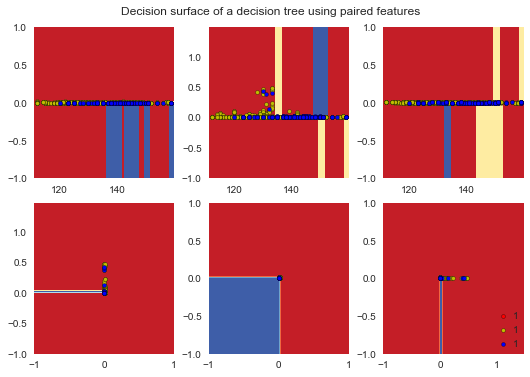

In [107]:
# Part C Question 2
#Code reference https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html 
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = df
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']
X = X.to_numpy()
y = y.to_numpy()
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    
    X_mod = X[:, pair]
    

    # Train
    # Best model that we are using here is DT_A
    clf_optimal = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=6,max_leaf_nodes=23, min_samples_leaf=6, min_samples_split=3).fit(X_mod, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X_mod[:, 0].min() - 1, X_mod[:, 0].max() + 1
    y_min, y_max = X_mod[:, 1].min() - 1, X_mod[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf_optimal.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_mod[idx, 0], X_mod[idx, 1], c=color, label=y[i],cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

